In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [4]:
df = pd.read_excel('/Users/haitonghuang/Downloads/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')
df1 = df.copy()
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

(None,
      AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
 0  422163   2378.908    837.8484    645.6693        0.6373  733.1539   
 1  338136   2085.144    723.8198    595.2073        0.5690  656.1464   
 2  526843   2647.394    940.7379    715.3638        0.6494  819.0222   
 3  416063   2351.210    827.9804    645.2988        0.6266  727.8378   
 4  347562   2160.354    763.9877    582.8359        0.6465  665.2291   
 
    SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  KurtosisRR  KurtosisRG  \
 0    0.9947       424428  0.7831        1.2976  ...      3.2370      2.9574   
 1    0.9974       339014  0.7795        1.2161  ...      2.6228      2.6350   
 2    0.9962       528876  0.7657        1.3150  ...      3.7516      3.8611   
 3    0.9948       418255  0.7759        1.2831  ...      5.0401      8.6136   
 4    0.9908       350797  0.7569        1.3108  ...      2.7016      2.9761   
 
    KurtosisRB    EntropyRR    EntropyRG    EntropyRB  ALLdaub4RR  ALLd

In [5]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [6]:
df.Class.value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

<AxesSubplot:>

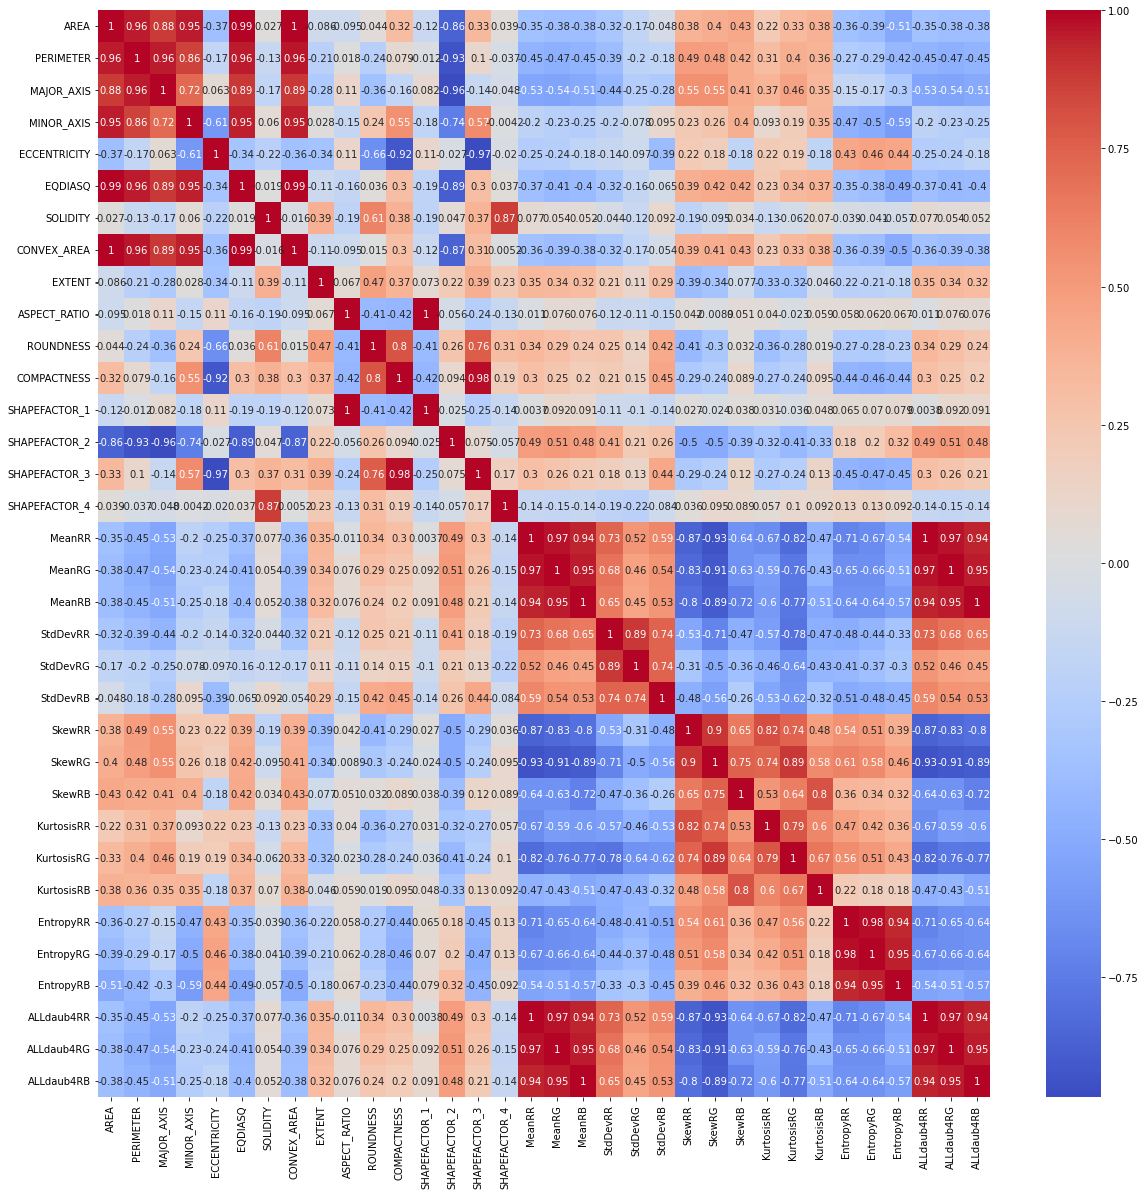

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [8]:
x = df.drop('Class', axis = 1)
lb = LabelEncoder()
y = lb.fit_transform(df['Class'])

x.shape, y.shape

((898, 34), (898,))

In [38]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [10]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print (len(x_train),len(x_test),len(y_train),len(y_test))

628 270 628 270


In [11]:
model_type = [RandomForestClassifier(), SVC(), XGBClassifier()]

RandomForestClassifier() 
Classificaiton Report
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.78      0.64      0.70        33
           2       0.91      0.98      0.95        54
           3       0.91      0.87      0.89        23
           4       0.94      0.96      0.95        48
           5       0.97      1.00      0.98        63
           6       0.74      0.71      0.73        28

    accuracy                           0.90       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.89      0.90      0.89       270



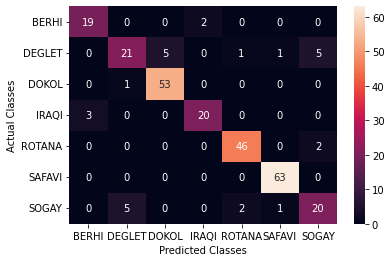

SVC() 
Classificaiton Report
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        21
           1       0.78      0.64      0.70        33
           2       0.90      0.96      0.93        54
           3       0.88      0.96      0.92        23
           4       0.98      0.96      0.97        48
           5       0.97      1.00      0.98        63
           6       0.79      0.82      0.81        28

    accuracy                           0.91       270
   macro avg       0.89      0.88      0.89       270
weighted avg       0.91      0.91      0.90       270



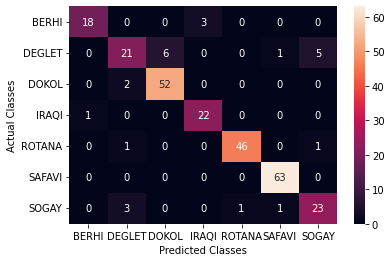

[14:41:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=10,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None) 
Classificaiton Report
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        21
           1       0.81      0.67      0.73        33
           2       0.93      0.98      0.95        54
           3       0.86      0.83      0.84        23
           4       0.

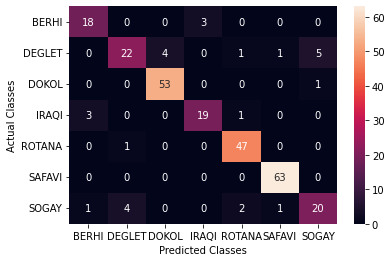

In [13]:
for m in model_type:
    pipe = make_pipeline(StandardScaler(), m)
    pipe.fit(x_train, y_train)
    y_predict = pipe.predict(x_test)
    
    print(m,'\nClassificaiton Report\n',classification_report(y_test, y_predict))
    cm = pd.DataFrame(confusion_matrix(y_test, y_predict), index=df['Class'].unique(), columns=df['Class'].unique())
    sns.heatmap(cm, annot=True)
    plt.ylabel('Actual Classes')
    plt.xlabel('Predicted Classes')
    plt.show()

## **COMPARING ACCURACY SCORE OF ALL THREE MODEL**

In [17]:
rfc = RandomForestClassifier(100)
rfc.fit(x_train,y_train)
rfc_y_pred = rfc.predict(x_test)

print('Y predicted: ',rfc_y_pred)
rfc_acc = accuracy_score(rfc_y_pred, y_test)

print('Y predicted: ',rfc_acc)

Y predicted:  [5 0 5 6 5 6 5 6 5 2 2 3 4 5 4 0 2 5 1 4 4 1 1 0 0 4 2 4 4 4 5 1 2 3 6 3 1
 4 2 2 1 5 4 4 6 3 3 2 1 5 4 3 2 1 2 6 5 3 5 2 3 2 5 2 0 6 3 6 5 5 5 6 6 5
 0 2 2 1 3 4 1 2 2 2 3 2 5 6 3 4 2 5 2 1 5 5 4 2 2 1 3 5 4 4 6 6 2 2 3 2 5
 6 2 2 2 1 5 3 1 2 5 4 4 3 2 5 1 5 1 3 5 5 1 5 2 0 4 0 0 5 5 5 3 5 3 4 6 4
 4 5 2 4 2 5 6 6 6 6 6 4 4 4 4 5 3 5 4 2 5 0 2 0 6 4 3 2 4 2 2 4 4 5 5 4 5
 2 5 2 2 4 5 5 4 4 4 5 2 0 5 5 5 2 6 1 0 1 6 6 0 2 4 1 0 2 1 4 5 1 6 3 5 2
 2 5 0 6 2 0 5 0 5 5 3 5 3 4 4 5 4 0 2 5 1 5 0 4 2 1 5 5 5 2 5 6 4 1 5 2 6
 4 2 2 5 2 1 2 4 4 2 4]
Y predicted:  0.8925925925925926


In [44]:
svc = SVC(C=3)
svc.fit(x_train, y_train)
svc_y_pred = svc.predict(x_test)
print('Y predicted: ',svc_y_pred)
svc_acc = accuracy_score(y_test, svc_y_pred)
print('Y predicted: ',svc_acc)

Y predicted:  [5 4 2 5 5 2 2 1 2 2 2 2 4 2 5 3 6 3 5 4 2 2 5 5 5 2 5 2 5 3 2 2 4 1 6 5 2
 2 3 4 3 2 5 1 4 2 1 3 2 2 2 2 4 5 2 5 1 1 4 2 4 4 1 4 6 4 6 3 4 3 4 2 5 2
 2 2 4 4 4 5 5 2 4 6 2 2 2 2 2 2 2 2 4 2 5 4 5 3 4 2 4 2 2 4 2 5 5 1 2 1 2
 2 4 5 4 5 5 4 5 3 5 4 5 2 2 2 1 4 2 5 2 5 2 5 4 2 6 4 4 6 1 4 2 1 3 1 2 5
 4 5 4 4 2 6 3 2 2 2 5 2 4 4 4 4 2 2 5 2 5 5 2 4 2 2 4 4 2 4 2 2]
Y predicted:  0.6222222222222222


In [20]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
xgbc_y_pred = xgbc.predict(x_test)
print('XGB Y predicted: ',xgbc_y_pred)
xgbc_acc = accuracy_score(y_test, xgbc_y_pred)
print('XGB Y predicted: ',xgbc_acc)

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:48:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Y predicted:  [5 0 5 6 5 6 5 6 5 2 2 3 4 5 4 0 2 5 1 4 4 1 1 0 4 4 2 4 4 4 5 6 2 3 6 3 1
 4 2 2 1 5 4 4 6 3 0 2 1 5 4 3 2 6 2 6 5 3 5 2 3 2 5 2 0 6 3 6 5 5 5 0 6 5
 0 2 2 1 3 4 1 2 2 2 3 2 5 6 3 4 2 5 2 1 5 5 4 2 2 2 3 5 4 4 6 6 2 2 0 2 5
 6 2 2 2 6 5 3 1 2 5 4 4 3 2 5 1 5 1 3 5 5 1 5 2 0 4 0 0 5 5 5 3 5 3 4 6 4
 4 5 2 4 2 5 6 1 6 6 4 4 4 4 4 5 3 5 4 2 5 0 2 0 6 4 3 2 4 2 1 4 4 5 5 4 5
 2 5 2 2 4 5 5 4 4 4 5 2 0 5 5 5 1 1 1 0 1 6 6 0 2 4 1 0 2 1 4 5 1 6 3 5 2
 2 5 0 6 2 0 5 0 5 5 3 5 3 4 4 5 4 0 2 5 1 5 0 4 2 1 5 5 5 2 5 1 4 1 5 2 6
 4 2 2 5 2 1 2 4 4 2 4]
XGB Y predicted:  0.8962962962962963


/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

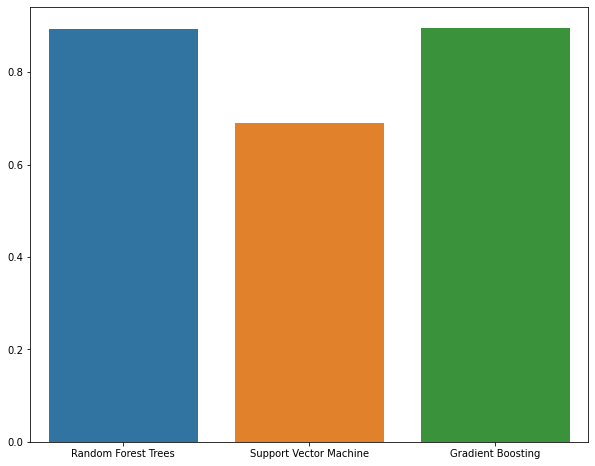

In [21]:
algorithms = ['Random Forest Trees','Support Vector Machine','Gradient Boosting']
scores = [rfc_acc, svc_acc, xgbc_acc]
plt.figure(figsize=(10,8))
sns.barplot(algorithms, scores)

In [22]:
rfc.feature_importances_

array([0.06517272, 0.0386042 , 0.0287217 , 0.06679223, 0.0081741 ,
       0.06451391, 0.01274018, 0.07051061, 0.00957658, 0.01508983,
       0.02128969, 0.01131372, 0.04820763, 0.00957618, 0.01333597,
       0.01493513, 0.0427384 , 0.04150803, 0.02950706, 0.00716508,
       0.01222398, 0.00841674, 0.02205159, 0.03596239, 0.03410926,
       0.01007511, 0.01868919, 0.02515576, 0.03060956, 0.03371991,
       0.03802892, 0.05192951, 0.02978061, 0.02977452])

In [23]:
feature_imp = pd.DataFrame({'importance': rfc.feature_importances_}, index = x.columns).sort_values('importance')
feature_imp

,importance
StdDevRR,0.007165
ECCENTRICITY,0.008174
StdDevRB,0.008417
SHAPEFACTOR_2,0.009576
EXTENT,0.009577
KurtosisRR,0.010075
COMPACTNESS,0.011314
StdDevRG,0.012224
SOLIDITY,0.012740
SHAPEFACTOR_3,0.013336


In [24]:
lo = feature_imp[feature_imp.importance > 0.02].index

In [26]:
x = x[lo]
x

,ROUNDNESS,SkewRR,KurtosisRB,MAJOR_AXIS,MeanRB,ALLdaub4RB,ALLdaub4RG,EntropyRR,EntropyRG,SkewRB,...,EntropyRB,PERIMETER,MeanRG,MeanRR,SHAPEFACTOR_1,ALLdaub4RR,EQDIASQ,AREA,MINOR_AXIS,CONVEX_AREA
0,0.9374,-0.5661,4.2287,837.8484,95.6774,47.8400,54.9554,-59191263232,-50714214400,0.6019,...,-39922372608,2378.9080,109.9085,117.4466,0.0020,58.7255,733.1539,422163,645.6693,424428
1,0.9773,-0.2328,3.1704,723.8198,95.6610,47.8315,52.8168,-34233065472,-37462601728,0.4134,...,-31477794816,2085.1440,105.6314,100.0578,0.0021,50.0259,656.1464,338136,595.2073,339014
2,0.9446,-0.7152,4.7192,940.7379,103.8750,51.9378,59.2860,-93948354560,-74738221056,0.9183,...,-60311207936,2647.3940,118.5703,130.9558,0.0018,65.4772,819.0222,526843,715.3638,528876
3,0.9458,0.4584,8.2618,827.9804,82.3751,41.1882,44.1259,-32074307584,-32060925952,1.8028,...,-29575010304,2351.2100,88.2531,86.7798,0.0020,43.3900,727.8378,416063,645.2988,418255
4,0.9358,-0.3552,4.4146,763.9877,85.3342,42.6666,50.9080,-39980974080,-35980042240,0.8865,...,-25593278464,2160.3540,101.8132,105.5484,0.0022,52.7743,665.2291,347562,582.8359,350797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,0.8658,-0.2737,2.7202,691.8453,84.8254,42.4153,43.0422,-25296416768,-19168882688,-0.1398,...,-18473392128,1925.3650,86.0790,98.1696,0.0027,49.0869,570.2536,255403,477.1796,261028
894,0.6475,-0.3319,3.9910,855.4633,73.1009,36.5502,39.1046,-31605219328,-21945366528,0.5611,...,-19277905920,2664.8230,78.2098,93.6238,0.0023,46.8086,682.5752,365924,551.5447,386566
895,0.8609,0.1838,2.6951,747.4943,81.9449,40.9769,40.7986,-22242772992,-19594921984,0.2665,...,-17592152064,1926.7360,81.5870,88.2526,0.0029,44.1325,569.0545,254330,435.6219,256255
896,0.8263,0.3400,2.7991,716.6485,91.2533,45.6260,45.7162,-26048595968,-21299822592,0.5325,...,-19809978368,1906.2679,91.4354,102.4622,0.0030,51.2267,551.5859,238955,441.8297,248795


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
clf.score(x_train,y_train), clf.score(x_test, y_test)

(1.0, 0.8777777777777778)

In [37]:
results = {}
for col in x.columns:
    temp_x = x.drop(col,axis=1)
    x_train, x_test, y_train, y_test = train_test_split(temp_x,y, test_size = 0.2)
    clf = RandomForestClassifier(100)
    clf.fit(x_train,y_train)
#     print(f'dropped {col}: train_score - {clf.score(X_train,y_train):.3f}, test_score - {clf.score(X_test, y_test):.3f}')
    results[col] = [clf.score(x_train,y_train), clf.score(x_test, y_test)]

In [47]:
pd.DataFrame(results).T.sort_values(by=1)

,0,1
ROUNDNESS,1.0,0.855556
EntropyRR,1.0,0.861111
SkewRR,1.0,0.861111
SHAPEFACTOR_4,1.0,0.861111
SHAPEFACTOR_2,1.0,0.866667
SHAPEFACTOR_1,1.0,0.872222
AREA,1.0,0.877778
MINOR_AXIS,1.0,0.877778
StdDevRG,1.0,0.877778
EQDIASQ,1.0,0.883333


In [30]:
x = df.drop(['PERIMETER','ALLdaub4RR','CONVEX_AREA','EntropyRG','MeanRG','PERIMETER','Class'], axis=1)
x

,AREA,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,...,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRB,ALLdaub4RG,ALLdaub4RB
0,422163,837.8484,645.6693,0.6373,733.1539,0.9947,0.7831,1.2976,0.9374,0.8750,...,-0.5661,-0.0114,0.6019,3.2370,2.9574,4.2287,-59191263232,-39922372608,54.9554,47.8400
1,338136,723.8198,595.2073,0.5690,656.1464,0.9974,0.7795,1.2161,0.9773,0.9065,...,-0.2328,0.1349,0.4134,2.6228,2.6350,3.1704,-34233065472,-31477794816,52.8168,47.8315
2,526843,940.7379,715.3638,0.6494,819.0222,0.9962,0.7657,1.3150,0.9446,0.8706,...,-0.7152,-0.1059,0.9183,3.7516,3.8611,4.7192,-93948354560,-60311207936,59.2860,51.9378
3,416063,827.9804,645.2988,0.6266,727.8378,0.9948,0.7759,1.2831,0.9458,0.8791,...,0.4584,1.2917,1.8028,5.0401,8.6136,8.2618,-32074307584,-29575010304,44.1259,41.1882
4,347562,763.9877,582.8359,0.6465,665.2291,0.9908,0.7569,1.3108,0.9358,0.8707,...,-0.3552,0.2101,0.8865,2.7016,2.9761,4.4146,-39980974080,-25593278464,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,691.8453,477.1796,0.7241,570.2536,0.9785,0.7269,1.4499,0.8658,0.8243,...,-0.2737,-0.0339,-0.1398,2.2423,2.3704,2.7202,-25296416768,-18473392128,43.0422,42.4153
894,365924,855.4633,551.5447,0.7644,682.5752,0.9466,0.6695,1.5510,0.6475,0.7979,...,-0.3319,0.5663,0.5611,3.4109,3.5805,3.9910,-31605219328,-19277905920,39.1046,36.5502
895,254330,747.4943,435.6219,0.8126,569.0545,0.9925,0.7240,1.7159,0.8609,0.7613,...,0.1838,0.6385,0.2665,2.2759,2.5090,2.6951,-22242772992,-17592152064,40.7986,40.9769
896,238955,716.6485,441.8297,0.7873,551.5859,0.9604,0.6954,1.6220,0.8263,0.7697,...,0.3400,0.8228,0.5325,2.6769,2.6874,2.7991,-26048595968,-19809978368,45.7162,45.6260


In [31]:
clf = RandomForestClassifier(100)
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
clf_acc = accuracy_score(y_test, clf_pred)
clf_acc

0.8277777777777777

In [32]:
xgbc = XGBClassifier()
xgbc.fit(x_train, y_train)
xgbc_pred = xgbc.predict(x_test)
xgbc_acc = accuracy_score(y_test, xgbc_pred)
xgbc_acc

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:51:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8333333333333334

In [33]:
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_acc

0.6

/Users/haitonghuang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

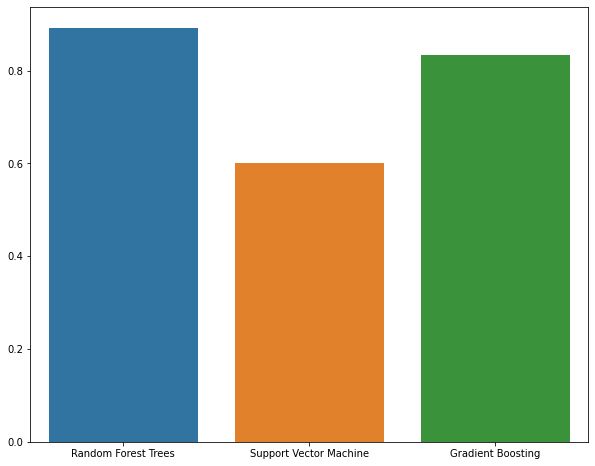

In [34]:
algorithms = ['Random Forest Trees','Support Vector Machine','Gradient Boosting']
scores = [rfc_acc, svc_acc, xgbc_acc]
plt.figure(figsize=(10,8))
sns.barplot(algorithms, scores)